### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Function

##### Func : scaling timestamp columns from miliseconds to seconds

In [2]:
def scale_timestamp(df, column_name='Timestamp'):
    df[column_name] = df[column_name] / 1000
    
    return df

##### Func : normal time plot 

In [3]:
def time_plot(df, name: str):
    plt.figure(figsize=(12, 6))
    plt.plot(df['Timestamp'], df['IR_Value'], label='IR Value', color='b', linewidth=2)

    plt.title(f'Grafik {name} PPG terhadap Timestamp')
    plt.xlabel('Waktu (Detik)')
    plt.ylabel('Nilai IR')

    plt.grid(True)
    plt.legend()
    plt.show()

##### Func : FFT transform

In [4]:
def fft_transform(df, ppg_columns='IR_Value', timestamp_columns='Timestamp'):
    ppg = df[ppg_columns].to_numpy()
    time = df[timestamp_columns].to_numpy()

    fs = 1 / (time[1] - time[0])
    n = len(ppg)

    print(f"Sampling Frequency  : {fs}")
    print(f"Signal Length       : {n}")

    freqs = np.fft.fftfreq(n, d=1/fs)
    fft_values = np.fft.fft(ppg)

    return freqs, np.abs(fft_values)

##### Func : frequency plot

In [5]:
def freq_plot(name: str, freqs_ppg, fft_ppg, zoom=False, lower_freqs: int=0, upper_freqs: int=1):
    plt.subplots(figsize=(12, 6))
    plt.plot(freqs_ppg[:len(fft_ppg)//2], np.log10(np.abs(fft_ppg[:len(fft_ppg)//2])))

    if zoom:
        plt.xlim(lower_freqs, upper_freqs)

    plt.title(f'Frequency Domain of {name} PPG Signal')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.tight_layout()
    plt.show()

### Dataset 1

In [6]:
df_1 = pd.read_csv('ppg_raw_data/raw_ppg_1.csv', sep=',', usecols=[1,2])
df_1.tail()

,Timestamp,IR_Value
579,70011,110246.0
580,70133,110316.0
581,70254,109304.0
582,70373,109880.0
583,70495,109809.0


In [7]:
df_1 = scale_timestamp(df=df_1)
df_1.tail()

,Timestamp,IR_Value
579,70.011,110246.0
580,70.133,110316.0
581,70.254,109304.0
582,70.373,109880.0
583,70.495,109809.0


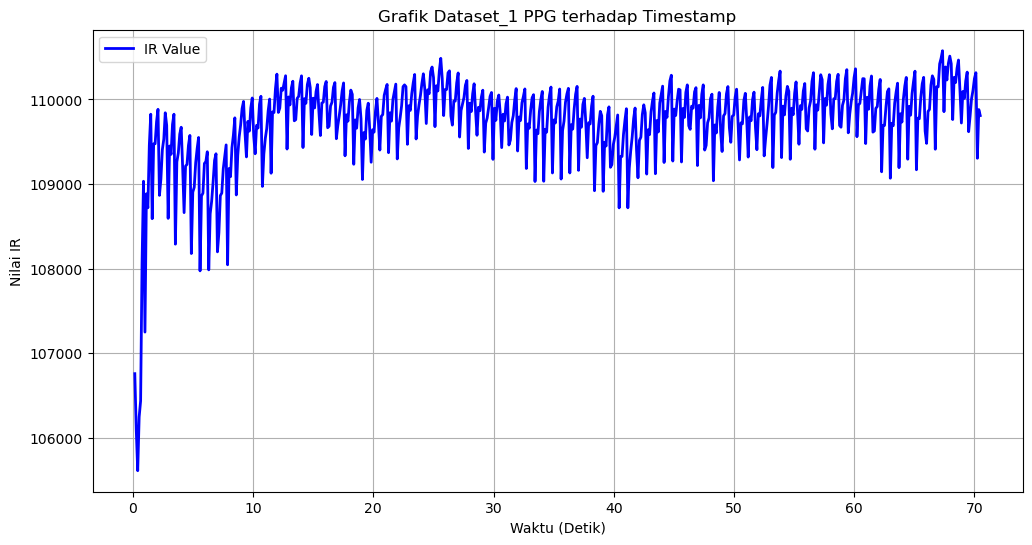

In [8]:
time_plot(df=df_1, name='Dataset_1')

In [9]:
freqs_ppg_1, fft_ppg_1 = fft_transform(df=df_1)

Sampling Frequency  : 8.264462809917354
Signal Length       : 584


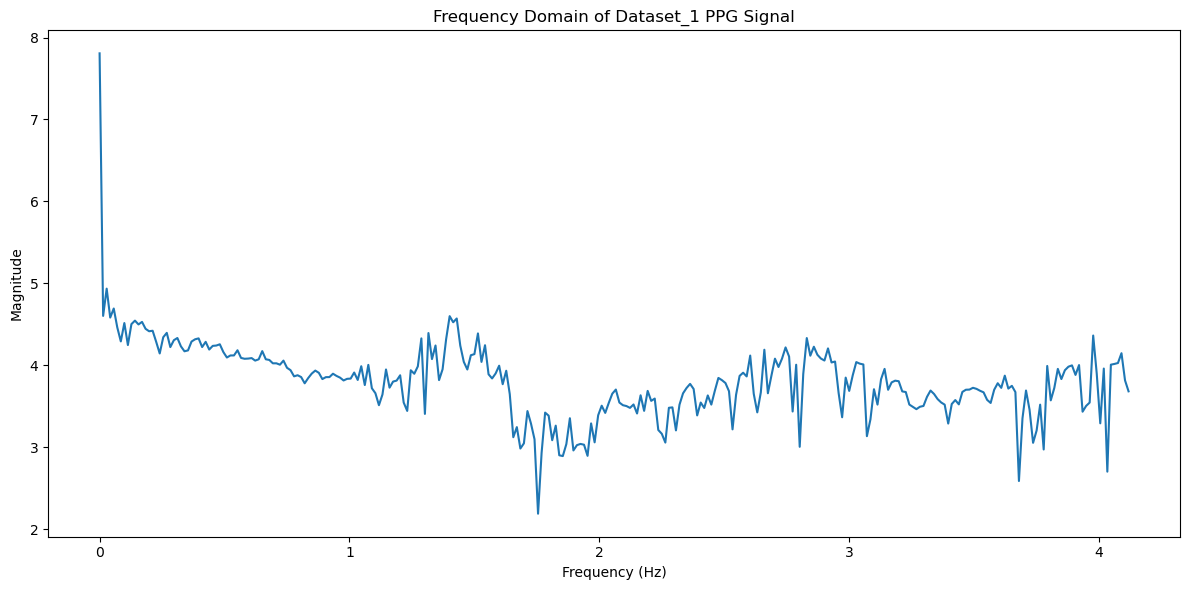

In [10]:
freq_plot(name='Dataset_1', freqs_ppg=freqs_ppg_1, fft_ppg=fft_ppg_1)

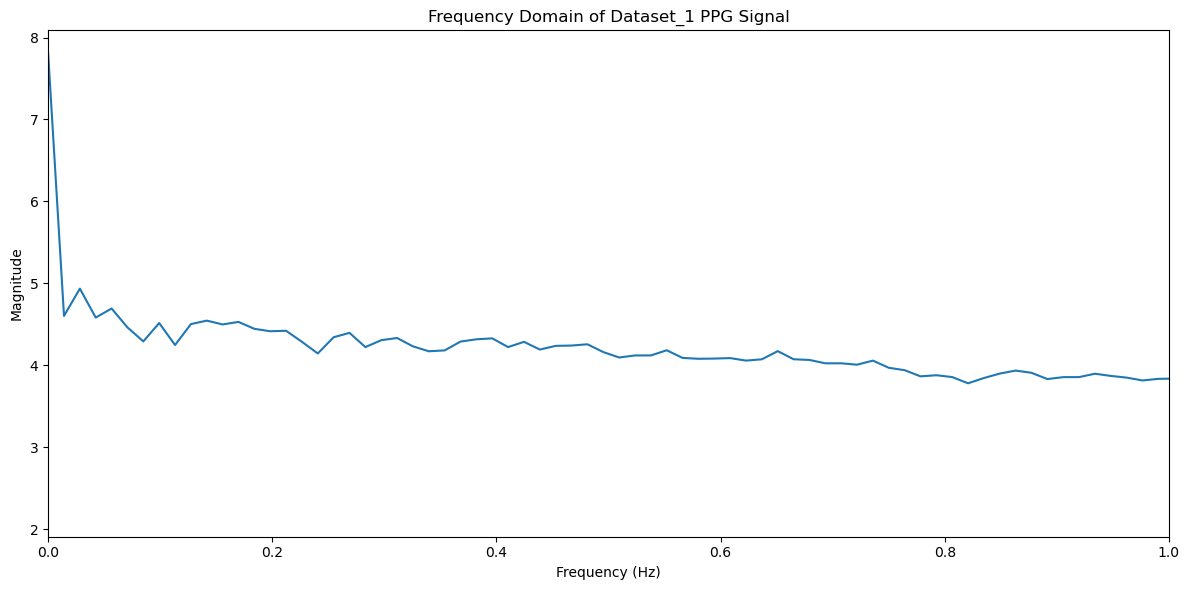

In [11]:
freq_plot(name='Dataset_1', freqs_ppg=freqs_ppg_1, fft_ppg=fft_ppg_1, zoom=True, lower_freqs=0, upper_freqs=1)

### Dataset 2

In [12]:
df_2 = pd.read_csv('ppg_raw_data/raw_ppg_2.csv', sep=',', usecols=[1,2])
df_2.tail()

,Timestamp,IR_Value
579,70021,105550.0
580,70141,109944.0
581,70261,105573.0
582,70382,103015.0
583,70503,99883.0


In [13]:
df_2 = scale_timestamp(df=df_2)
df_2.tail()

,Timestamp,IR_Value
579,70.021,105550.0
580,70.141,109944.0
581,70.261,105573.0
582,70.382,103015.0
583,70.503,99883.0


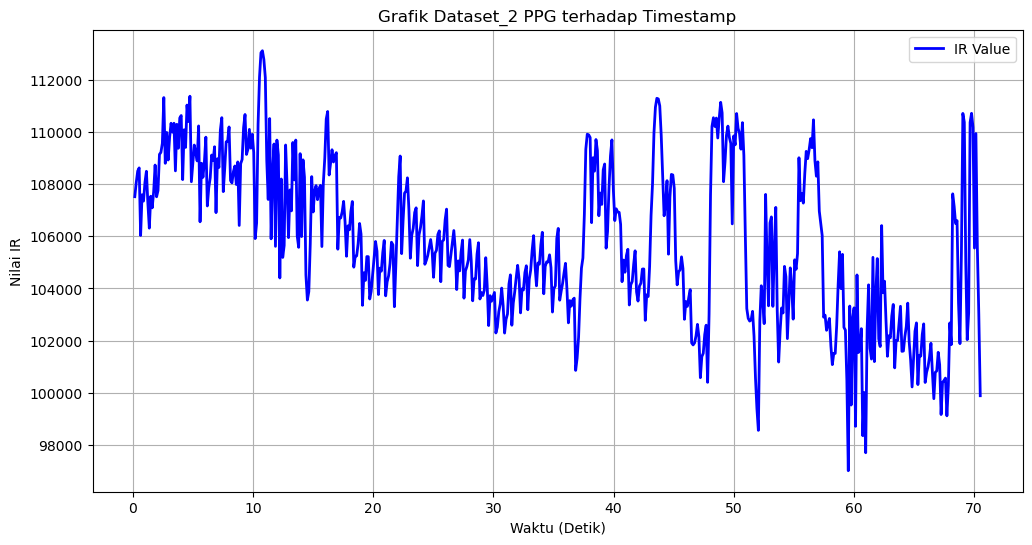

In [14]:
time_plot(df=df_2, name='Dataset_2')

In [15]:
freqs_ppg_2, fft_ppg_2 = fft_transform(df=df_2)

Sampling Frequency  : 8.264462809917354
Signal Length       : 584


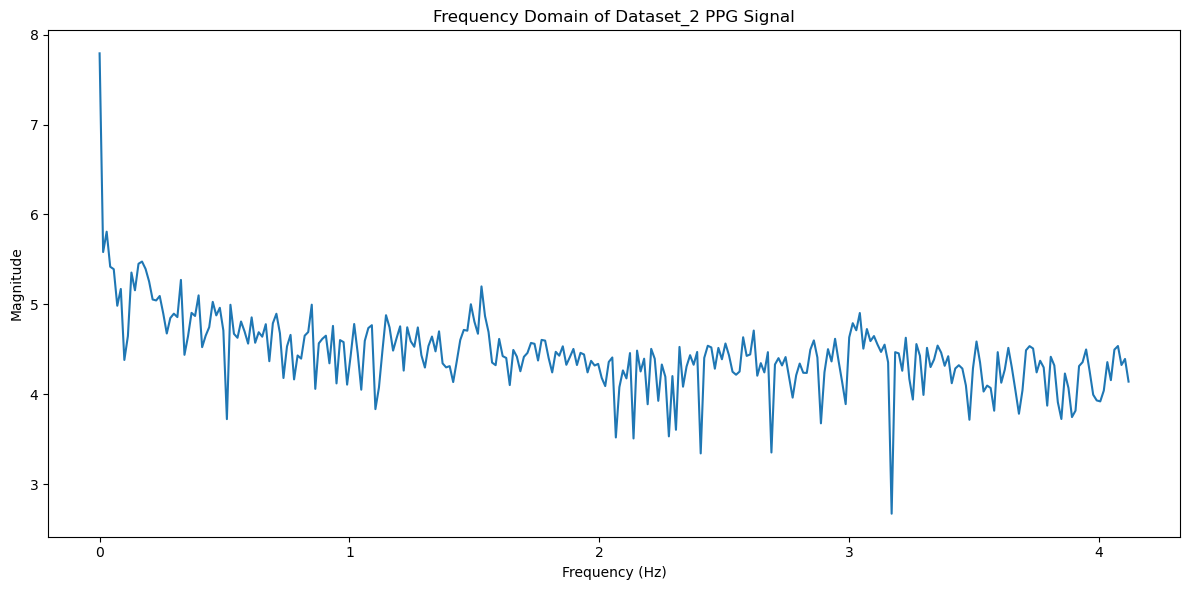

In [16]:
freq_plot(name='Dataset_2', freqs_ppg=freqs_ppg_2, fft_ppg=fft_ppg_2)

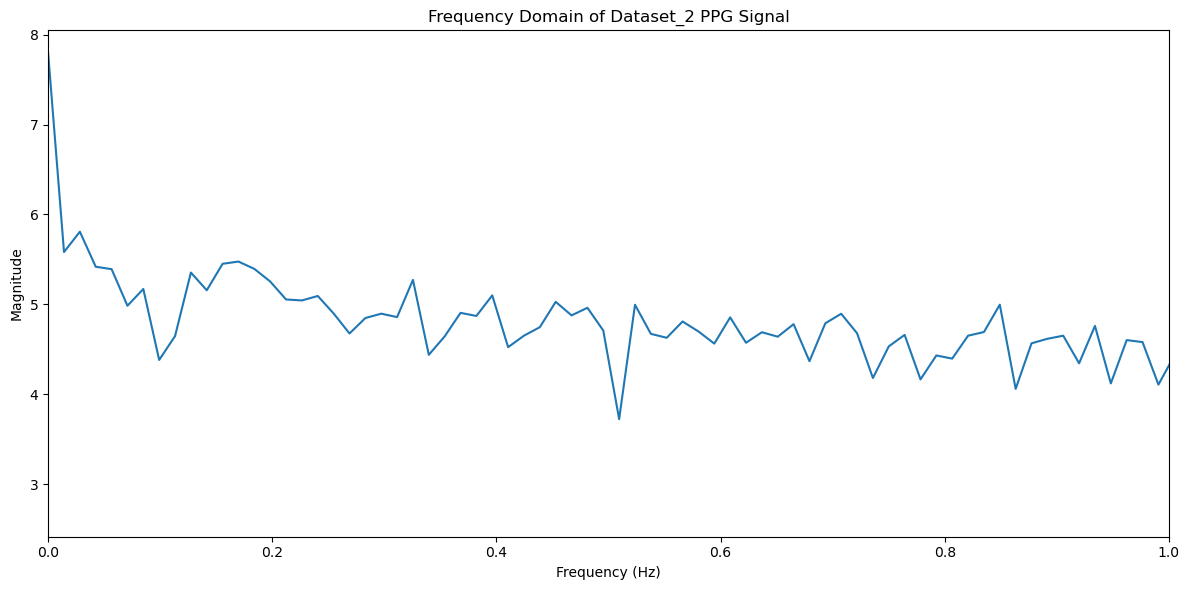

In [17]:
freq_plot(name='Dataset_2', freqs_ppg=freqs_ppg_2, fft_ppg=fft_ppg_2, zoom=True, lower_freqs=0, upper_freqs=1)